**Curating Dataset**

The regression model used for the regression models is called PCOS_data_without_intertility.csv. 

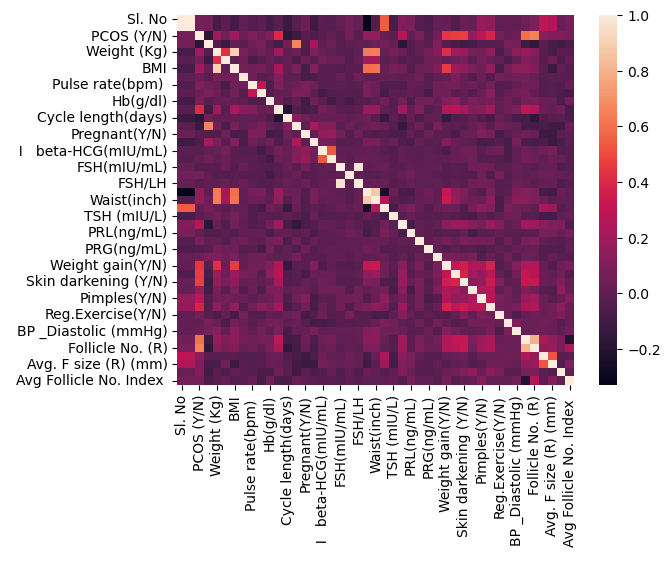

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score 

dataFile = pd.read_csv ('PCOS_data_without_infertilityV2.csv')

dataFile_hm = sns.heatmap(dataFile.corr(), annot = False)

In [70]:
dataFile = dataFile.dropna()

dataFile = dataFile.drop('Sl. No', axis = 1)
dataFile = dataFile.drop('Patient File No.', axis = 1)
dataFile = dataFile.drop('Follicle No. (L)', axis = 1)
dataFile = dataFile.drop('Follicle No. (R)', axis = 1)

x = dataFile.drop(columns = ['Avg Follicle No. Index ']).copy()
y = dataFile ['Avg Follicle No. Index ']

x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 42)

**Exploratory Data Analysis**

In [71]:
from matplotlib import pyplot as plt

In [72]:
dataFile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PCOS (Y/N)               539 non-null    int64  
 1    Age (yrs)               539 non-null    int64  
 2   Weight (Kg)              539 non-null    float64
 3   Height(Cm)               539 non-null    float64
 4   BMI                      539 non-null    float64
 5   Blood Group              539 non-null    int64  
 6   Pulse rate(bpm)          539 non-null    int64  
 7   RR (breaths/min)         539 non-null    int64  
 8   Hb(g/dl)                 539 non-null    float64
 9   Cycle(R/I)               539 non-null    int64  
 10  Cycle length(days)       539 non-null    int64  
 11  Marraige Status (Yrs)    539 non-null    float64
 12  Pregnant(Y/N)            539 non-null    int64  
 13  No. of aborptions        539 non-null    int64  
 14    I   beta-HCG(mIU/mL)   5

In [73]:
dataFile.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Avg Follicle No. Index
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,0.326531,31.430427,59.637291,156.471792,24.315408,13.801484,73.252319,19.237477,11.161558,2.554731,...,0.452690,0.491651,0.515770,0.246753,114.641929,76.935065,15.018182,15.449666,8.472115,1.165830
std,0.469380,5.414105,11.041874,6.039703,4.061713,1.843182,4.437858,1.687260,0.868019,0.899334,...,0.498219,0.500395,0.500215,0.431522,7.391079,5.574892,3.565130,3.319807,2.166571,0.626576
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.674599,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,13.000000,13.000000,7.000000,0.785714
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,15.000000,16.000000,8.500000,1.000000
75%,1.000000,35.000000,65.000000,160.000000,26.650813,15.000000,74.000000,20.000000,11.750000,4.000000,...,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,18.000000,18.000000,9.800000,1.500000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,24.000000,24.000000,18.000000,3.750000


<AxesSubplot:>

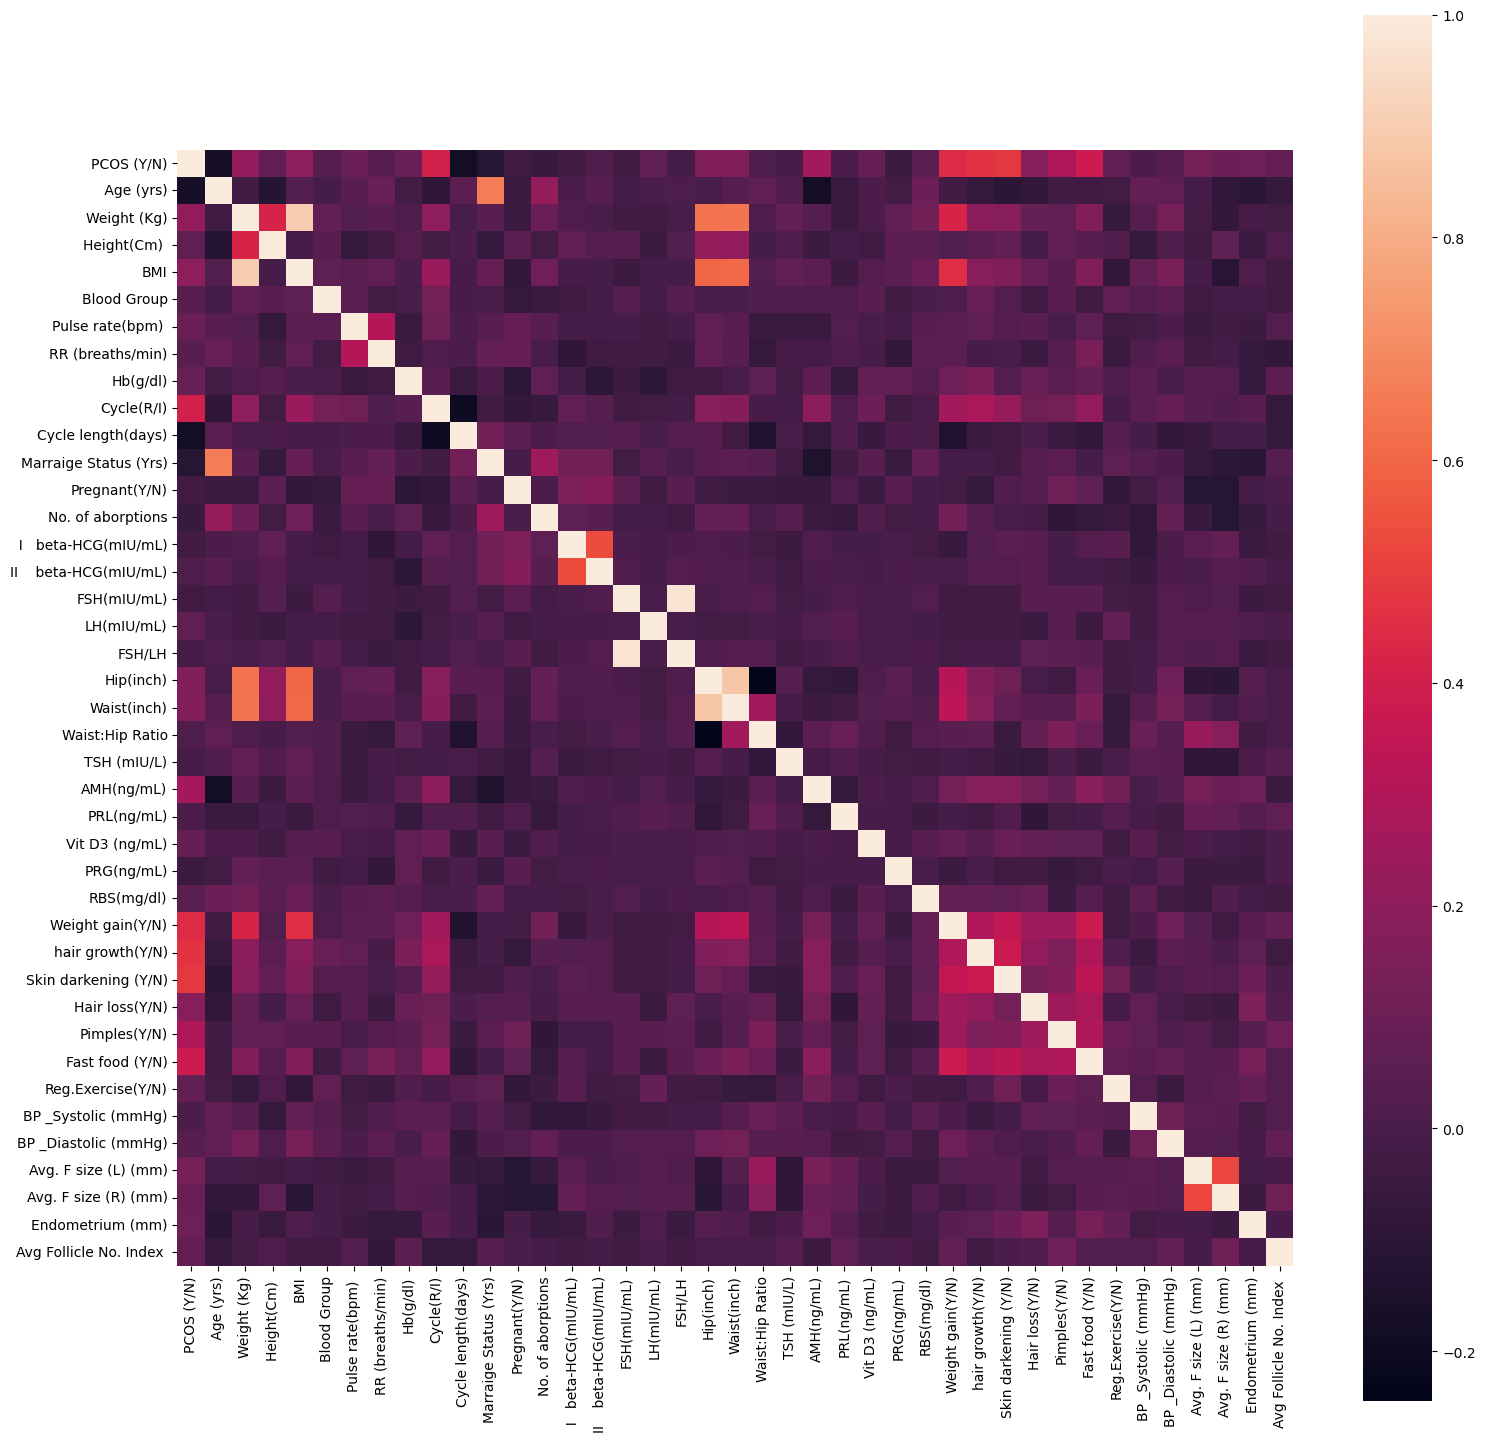

In [74]:
corrmatrix = dataFile.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmatrix, square=True)

In [75]:
corrmatrix["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                 1.000000
Skin darkening (Y/N)       0.481768
hair growth(Y/N)           0.466930
Weight gain(Y/N)           0.443652
Cycle(R/I)                 0.402312
Fast food (Y/N)            0.381772
Pimples(Y/N)               0.288609
AMH(ng/mL)                 0.264838
Weight (Kg)                0.210280
BMI                        0.198638
Hair loss(Y/N)             0.177458
Waist(inch)                0.162143
Hip(inch)                  0.161700
Avg. F size (L) (mm)       0.129181
Endometrium (mm)           0.109132
Avg. F size (R) (mm)       0.094268
Pulse rate(bpm)            0.092437
Hb(g/dl)                   0.086934
Vit D3 (ng/mL)             0.085829
Avg Follicle No. Index     0.073830
Reg.Exercise(Y/N)          0.069481
Height(Cm)                 0.066361
LH(mIU/mL)                 0.064136
RBS(mg/dl)                 0.049420
RR (breaths/min)           0.038031
BP _Diastolic (mmHg)       0.035110
Blood Group                0.034244
II    beta-HCG(mIU/mL)     0

array([[<AxesSubplot:title={'center':'PCOS (Y/N)'}>,
        <AxesSubplot:title={'center':' Age (yrs)'}>,
        <AxesSubplot:title={'center':'Weight (Kg)'}>,
        <AxesSubplot:title={'center':'Height(Cm) '}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Blood Group'}>],
       [<AxesSubplot:title={'center':'Pulse rate(bpm) '}>,
        <AxesSubplot:title={'center':'RR (breaths/min)'}>,
        <AxesSubplot:title={'center':'Hb(g/dl)'}>,
        <AxesSubplot:title={'center':'Cycle(R/I)'}>,
        <AxesSubplot:title={'center':'Cycle length(days)'}>,
        <AxesSubplot:title={'center':'Marraige Status (Yrs)'}>],
       [<AxesSubplot:title={'center':'Pregnant(Y/N)'}>,
        <AxesSubplot:title={'center':'No. of aborptions'}>,
        <AxesSubplot:title={'center':'  I   beta-HCG(mIU/mL)'}>,
        <AxesSubplot:title={'center':'II    beta-HCG(mIU/mL)'}>,
        <AxesSubplot:title={'center':'FSH(mIU/mL)'}>,
        <AxesSubplot:title={'center':

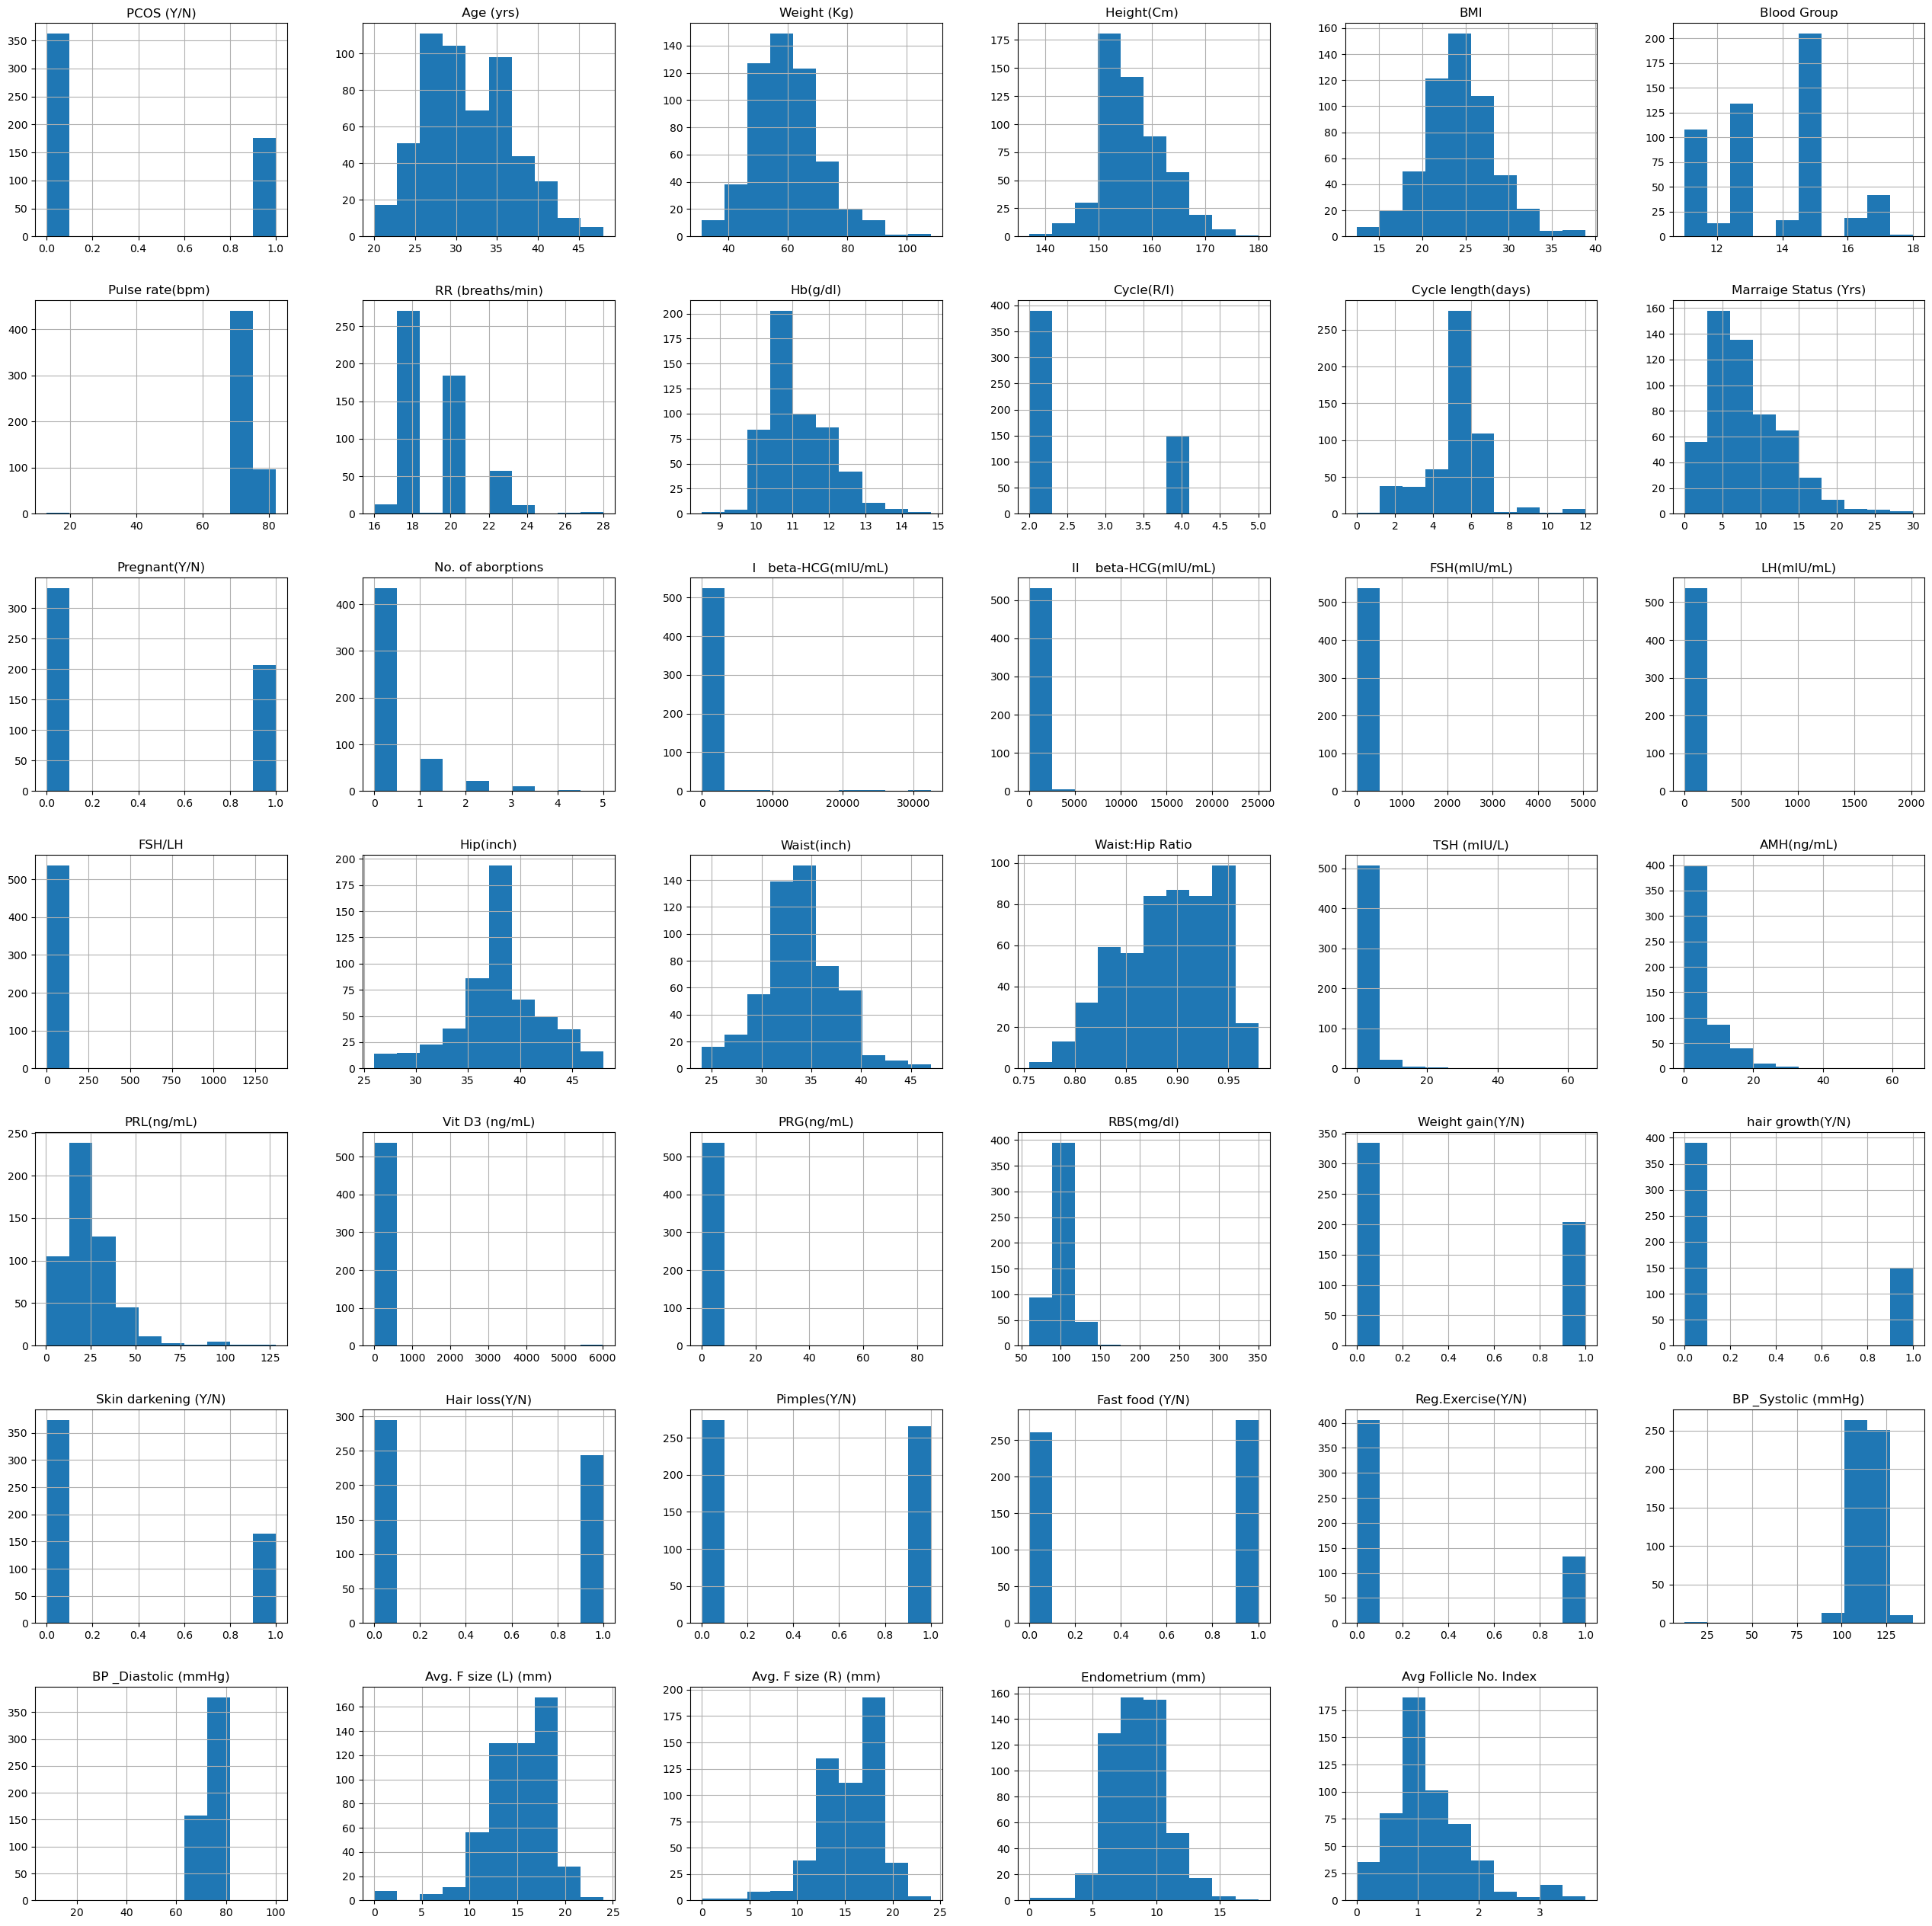

In [76]:
dataFile.hist(figsize=(32,32))

**Multiple Linear Regression Analysis**

In [77]:
from sklearn.linear_model import LinearRegression 

In [78]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

lr_ypred_test = lr.predict(x_test)
lr_ytrain_pred = lr.predict(x_train)

RMSE for Test Data: 0.7279397579628573
R-squared for Testing Multiple Linear Regression Model: -6.083612949754347


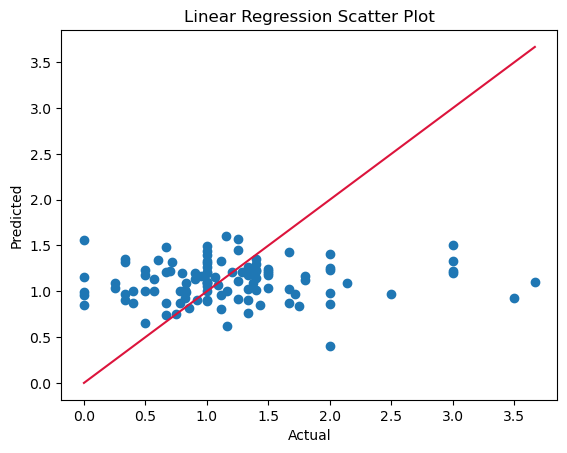

RMSE for Training Data: 0.5651769500077638
R-squared for Training Multiple Linear Regression Model: 12.446569930545259


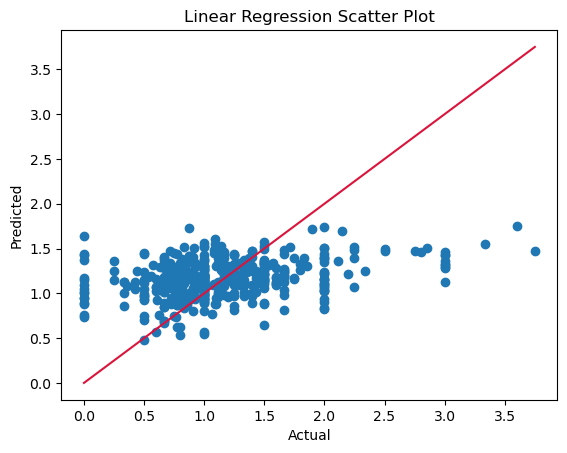

In [84]:
#Multiple Linear Regression Test

rmse_mlr_test = sqrt(mean_squared_error(y_test, lr_ypred_test))
r2_mlr_test = r2_score(y_test, lr_ypred_test)

print('RMSE for Test Data:',rmse_mlr_test)
print('R-squared for Testing Multiple Linear Regression Model:', r2_mlr_test*100)

plt.scatter(y_test, lr_ypred_test)

p1 = max(max(lr_ypred_test), max(y_test))
p2 = min(min(lr_ypred_test), min(y_test))
plt.plot([p1,p2], [p1,p2], c='crimson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Scatter Plot')
plt.show()

#Multiple Linear Regression Train

rmse_mlr_train = sqrt(mean_squared_error(y_train, lr_ytrain_pred))
r2_mlr_train = r2_score(y_train, lr_ytrain_pred)

print('RMSE for Training Data:',rmse_mlr_train)
print('R-squared for Training Multiple Linear Regression Model:',r2_mlr_train*100)

plt.scatter(y_train, lr_ytrain_pred)

p1 = max(max(lr_ytrain_pred), max(y_train))
p2 = min(min(lr_ytrain_pred), min(y_train))
plt.plot([p1,p2], [p1,p2], c='crimson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Scatter Plot')
plt.show()

**Gradient Boosting Regression Model**

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

RMSE for Testing Data: 0.7298180316839546
R-squared for Test Gradient Boosting Regression Model -0.06631765798633582


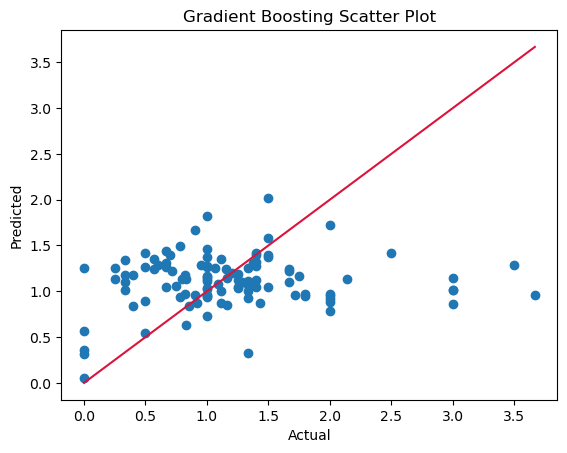

RMSE for Training Data: 0.3132728890185801
R-squared for Train Gradient Boosting Regression Model 0.7310014700743499


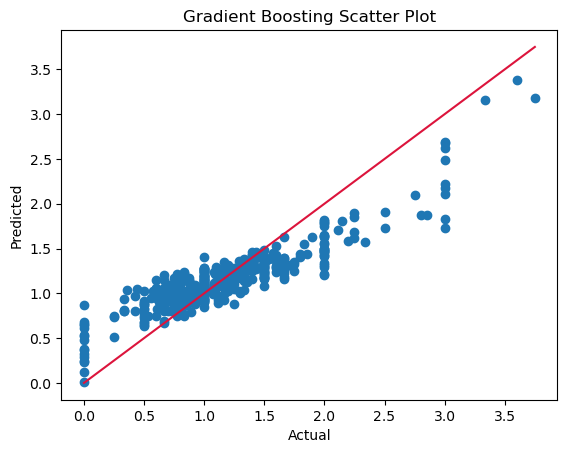

In [81]:
gbrmodel = GradientBoostingRegressor()
gbrmodel.fit(x_train,y_train)

y_predgbr_test = gbrmodel.predict(x_test)
y_predgbr_train = gbrmodel.predict(x_train)

#GBR Test

gbr_test_rmse = sqrt(mean_squared_error(y_test, y_predgbr_test))
r2_gbr_test = r2_score(y_test, y_predgbr_test)
print('RMSE for Testing Data:', gbr_test_rmse)
print('R-squared for Test Gradient Boosting Regression Model',r2_gbr_test)
plt.scatter(y_test, y_pred_test)
p1 = max(max(y_predgbr_test), max(y_test))
p2 = min(min(y_predgbr_test), min(y_test))
plt.plot([p1,p2], [p1,p2], c='crimson')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Scatter Plot')
plt.show()

#GBR Train
gbr_train_rmse = sqrt(mean_squared_error(y_train, y_predgbr_train))
r2_gbr_train = r2_score(y_train, y_predgbr_train)
print('RMSE for Training Data:', gbr_train_rmse)
print('R-squared for Train Gradient Boosting Regression Model',r2_gbr_train)

plt.scatter(y_train, y_pred_train)
p1 = max(max(y_predgbr_train), max(y_train))
p2 = min(min(y_predgbr_train), min(y_train))
plt.plot([p1,p2], [p1,p2], c='crimson')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Scatter Plot')
plt.show()

**Support Vector Machines**

In [82]:
from sklearn.svm import SVR

RMSE for Testing Data: 0.7117627121131639
R-squared for Test Supported Vector Machines Model: -0.014209997522728113


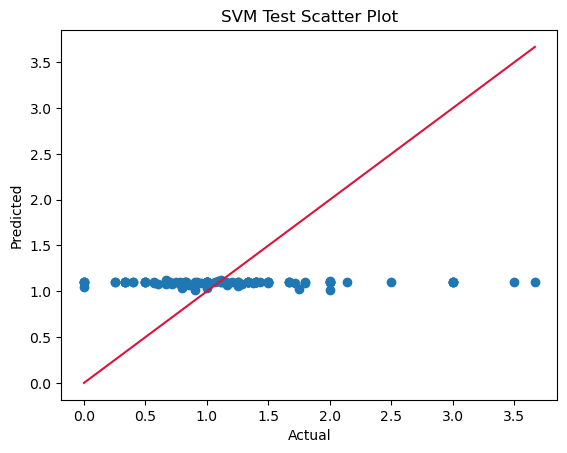

RMSE for Training Data: 0.6052930138387206
R-squared for Train Supported Vector Machines Model: -0.0042355816329378015


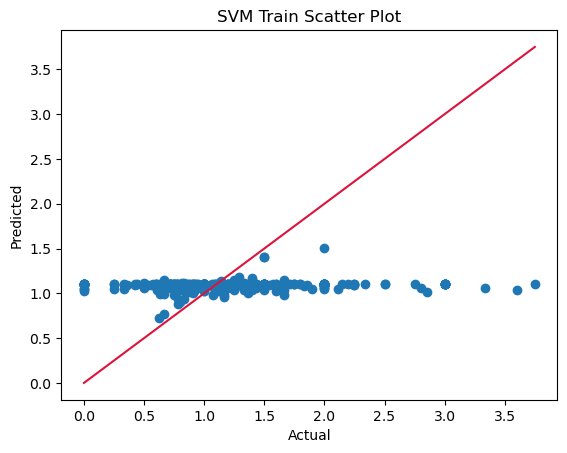

In [83]:
svr = SVR()
svr.fit(x_train, y_train)

svr.fit(x_train, y_train)
svr.score(x_test, y_test)

#SVR Test

svr_ypred_test = svr.predict(x_test)

rmse_svr_test = sqrt(mean_squared_error(y_test, svr_ypred_test))
r2_svr_test = r2_score(y_test, svr_ypred_test)

print('RMSE for Testing Data:', rmse_svr_test)
print('R-squared for Test Supported Vector Machines Model:', r2_svr_test)

plt.scatter(y_test, svr_ypred_test)
p1 = max(max(svr_ypred_test), max(y_test))
p2 = min(min(svr_ypred_test), min(y_test))
plt.plot([p1,p2], [p1,p2], c='crimson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Test Scatter Plot')
plt.show()

#SVR Train

svr_ypred_train = svr.predict(x_train)

rmse_svr_train = sqrt(mean_squared_error(y_train, svr_ypred_train))
r2_svr_train = r2_score(y_train, svr_ypred_train)

print('RMSE for Training Data:', rmse_svr_train)
print('R-squared for Train Supported Vector Machines Model:', r2_svr_train)

plt.scatter(y_train, svr_ypred_train)
p1 = max(max(svr_ypred_train), max(y_train))
p2 = min(min(svr_ypred_train), min(y_train))
plt.plot([p1,p2], [p1,p2], c='crimson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Train Scatter Plot')
plt.show()

